**Author** : Asad Mujeeb

**Model** : `Random Forest Classifier`

**Linkedin** : [Link](https://www.linkedin.com/in/asadmujeeb/)



`Random Forest Classifier`

A Random Forest classifier is a type of ensemble learning algorithm used for classification tasks.


 It is part of the broader family of Random Forest models and relies on multiple decision trees to make predictions.

`Application of Model`

**Medical Diagnosis :** Predicting the likelihood of diseases based on patient data.


**Finance :** Credit risk assessment and fraud detection.


**E-commerce :** Product recommendations and customer segmentation.


**Natural Language Processing :** Text classification and sentiment analysi

`About the Dataset`


The Penguin dataset is a collection of data about penguins from the Palmer Station in Antarctica. It includes the following features:

Culmen Length (mm)

Culmen Depth (mm)

Flipper Length (mm)

Body Mass (g)

Sex: Male or Female

Island: Biscoe, Dream, or Torgersen

The target variable is the species of the penguin, which is used for classification tasks.

# Import the Libraries

In [333]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Read the data

In [334]:
df = pd.read_csv(r"C:\Users\Asad Mujeeb\Desktop\archive\penguins.csv")

In [335]:
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# Pre-Processing

In [336]:
df.shape

(344, 9)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [338]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,344.0,172.500000,99.448479,1.0,86.750,172.50,258.25,344.0
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.50,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.70,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.00,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.00,6300.0
year,344.0,2008.029070,0.818356,2007.0,2007.000,2008.00,2009.00,2009.0


In [339]:
# check the null values

In [340]:
df.isnull().sum()

Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

**remove the irrelevant data**

In [341]:
df.drop(["Unnamed: 0", "year"], inplace = True, axis = 1)

**Drop the extra column**

In [342]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

# Encode the sex column

In [343]:
sex = pd.get_dummies(df["sex"]).astype(int)

sex

,female,male
0,0,1
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
339,0,1
340,1,0
341,0,1
342,0,1


# Encode the Island column

In [344]:
island = pd.get_dummies(df["island"]).astype(int)

island

,Biscoe,Dream,Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
339,0,1,0
340,0,1,0
341,0,1,0
342,0,1,0


# Concat the data

In [345]:
new_df = pd.concat([df, sex, island],axis = 1 )

new_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,female,male,Biscoe,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,0,1,0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,1,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,1,0,0,0,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,1,0,0,0,1


**remove the duplicate columns**

In [346]:
new_df.drop(["island", "sex"], axis = 1, inplace = True)

In [347]:
new_df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,female,male,Biscoe,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,1,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,0,0,1
3,Adelie,NaN,NaN,NaN,NaN,0,0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1,0,0,0,1


# remove null values

In [348]:
new_df.dropna(inplace = True)

In [349]:
new_df.isnull().sum().sum()

0

In [350]:
new_df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,female,male,Biscoe,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,1,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1,0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,0,1,0,0,1


# separate x and y

In [351]:
x = new_df.drop("species", axis = 1)

In [352]:
x

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,female,male,Biscoe,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,0,1,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,0,1
4,36.7,19.3,193.0,3450.0,1,0,0,0,1
5,39.3,20.6,190.0,3650.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,0,1,0,1,0
340,43.5,18.1,202.0,3400.0,1,0,0,1,0
341,49.6,18.2,193.0,3775.0,0,1,0,1,0
342,50.8,19.0,210.0,4100.0,0,1,0,1,0


In [353]:
y = new_df["species"]
y

0         Adelie
1         Adelie
2         Adelie
4         Adelie
5         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
343    Chinstrap
Name: species, Length: 342, dtype: object

In [354]:
y.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [355]:
y = y.map({"Adelie" : 0, "Gentoo" : 1, "Chinstrap" : 2})
y

0      0
1      0
2      0
4      0
5      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 342, dtype: int64

# Split the model

In [356]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [357]:
print("x_train shape : ", x_train.shape)
print("y_train shape : ", y_train.shape)
print("x_test shape : ", x_test.shape)
print("y_test shape : ", y_test.shape)

x_train shape :  (239, 9)
y_train shape :  (239,)
x_test shape :  (103, 9)
y_test shape :  (103,)


In [358]:
model = RandomForestClassifier(n_estimators = 5, criterion = "entropy", random_state = 0)

In [359]:
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

**Predict the model**

In [360]:
y_pred = model.predict(x_test)

In [361]:
y_pred

array([0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0,
       2, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1,
       0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0,
       1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0], dtype=int64)

**Confusion Matrix**

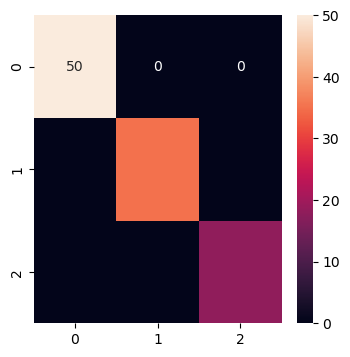

In [362]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  confusion_matrix, accuracy_score, classification_report

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

**Model Score**

In [363]:
print("Model score  : ", accuracy_score(y_test, y_pred) * 100)

Model score  :  100.0


**Classification Report**

In [364]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        18

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



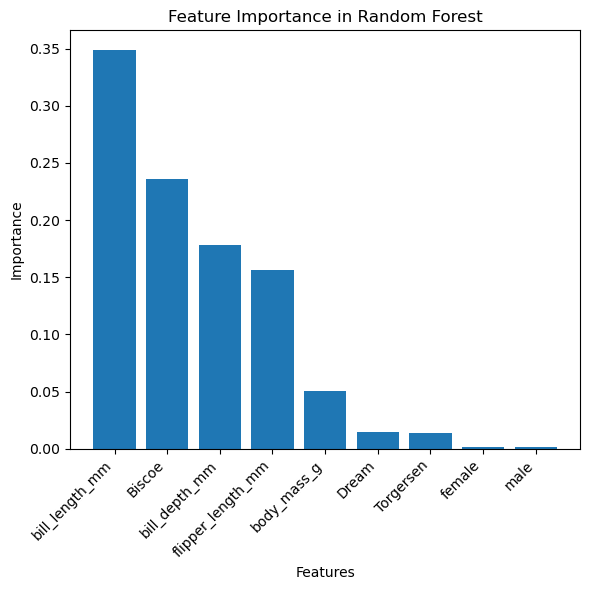

In [365]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Sort features by importance
indices = feature_importances.argsort()[::-1]
features = x_train.columns[indices]

# Create a bar plot for feature importances
plt.figure(figsize=(6, 6))  # Adjust figure size to provide more space
plt.bar(features, feature_importances[indices])

# Adjust the x-axis labels to avoid overlapping
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align to the right
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.tight_layout()  # Adjusts subplots to fit in the figure area
plt.show()


Thank You !